<a href="https://colab.research.google.com/github/ivybart/Test/blob/main/Respondents_Automated_Updates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the required dependencies
!pip install geopandas pandas shapely contextily matplotlib

In [3]:
# import required libraries
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
# Upload required csvs
from google.colab import files
uploaded = files.upload()



Saving All_Data.csv to All_Data.csv


In [5]:
# set up filepaths
csv_file = 'All_Data.csv'
shapefile = 'PartA.shp'

In [21]:
#Read CSV and filter to today's date
df = pd.read_csv(csv_file)
# Preview all column headers and the first 5 rows
print("Column Headers:", df.columns.tolist())
print("\nFirst 5 Rows:")
print(df.head())


filter_date = '2024-10-30'

# filter to the required data
df_today = df[df['date'] == filter_date]

# Convert to geodataframe
gdf = gpd.GeoDataFrame(
    df_today,
    geometry=gpd.points_from_xy(df_today['_gps_location_longitude.1'], df_today['_gps_location_latitude.1']),
    crs="EPSG:4326"
)

Column Headers: ['collector_name', 'date', 'zone', 'zubzone', 'master_operator', 'premise_type', 'housing_type', 'who_manages_ablution', 'domestic_house_types', 'number_of_hh', 'number_of_persons_per_household', 'number_of_livestock_in_household', 'building_name', 'mdu_category', 'mdu_type', 'number_of_domestic_units_per_hh', 'number_of_commercial_units', 'type_of_commercial_unit', 'number_of_institution_in_the_mdu', 'type_of_institutions_in_the_mdu', 'commercial_types', 'industrial_types', 'institution_types', 'health_facility', 'category_of_health_facilty', 'institution_category', 'number_of_people_in_institution', 'number_of_livestock_in_institution', 'company_email', 'number_of_taps', 'average_no_of_pple_served_by_kiosk_perday', 'kiosk_types', 'average_no_of_people_served_at_the_ablution_block', 'first_name_landlord', 'middle_name_landlord', 'surname_landlord', 'lr_no', 'owner_address_cell', 'alternative_phone', 'previous_owner_name', 'previous_owner_address_cell', 'address_of_conn

<ipython-input-21-86c53df312d7>:2: DtypeWarning: Columns (21,23,24,36,102,103,129,134,177,178,211,237) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


In [23]:
# Load shapefile
shape = gpd.read_file(shapefile)
shape = shape.to_crs(gdf.crs)

# clip points to shapefile
gdf_clipped = gpd.clip(gdf, shape)

# specify output columns
output_gdf = gdf_clipped[['collector_name', 'date', 'zone', 'zubzone', 'master_operator', '_gps_location_latitude','_gps_location_longitude','_gps_location_precision','_gps_location_latitude.1','_gps_location_longitude.1','_gps_location_precision.1']]


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:891: UserWarning: The label '_gps_location_latitude' of <matplotlib.lines.Line2D object at 0x7c7262131300> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:891: UserWarning: The label '_gps_location_longitude' of <matplotlib.lines.Line2D object at 0x7c7262131690> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:891: UserWarning: The label '_gps_location_precision' of <matplotlib.lines.Line2D object at 0x7c7262131a50> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:891: UserWarning: The label '_gps_location_latitu

ValueError: cannot convert float NaN to integer

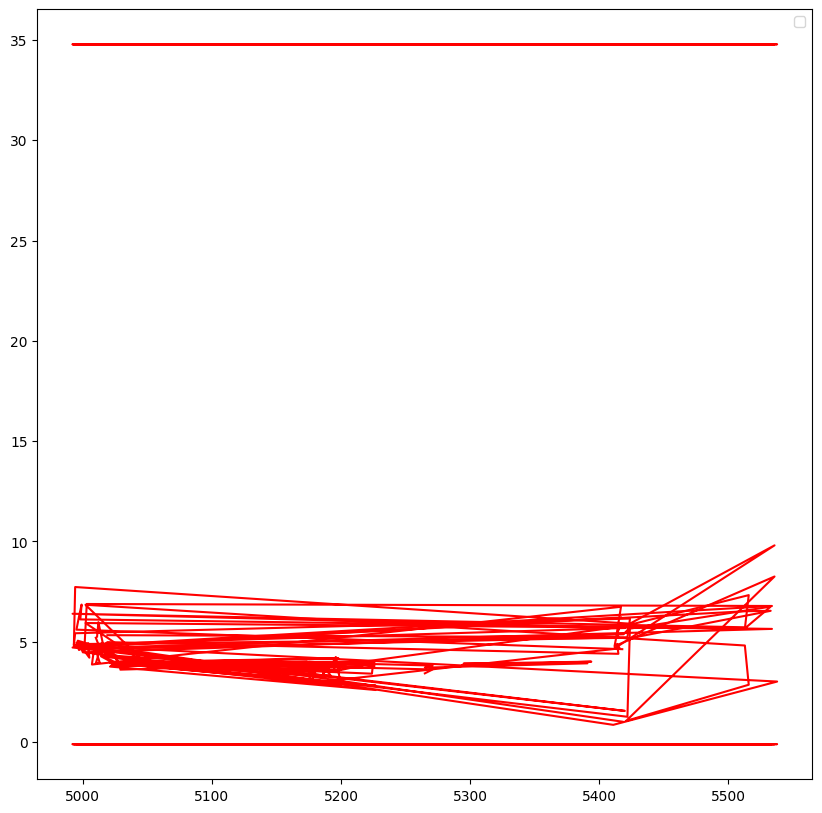

In [28]:
# Visualize points on a basemap
fig, ax = plt.subplots(figsize=(10, 10))
#shape.plot(ax=ax, edgecolor="black", color="none")  # Plot shapefile boundary
output_gdf.plot(ax=ax, color="red", markersize=10, label="Filtered Points")  # Plot points
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.Esri.WorldImagery)  # Add basemap
plt.legend()
plt.show()

In [ ]:
# Export Output
output_gdf.to_csv('filtered_clipped_data.csv', index=False)
files.download('filtered_clipped_data.csv')